In [10]:
import torch
import torchvision
from torchvision import datasets,transforms
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [11]:
data_train = datasets.MNIST(root="./data/",
                            transform=transforms.ToTensor(),
                            train=True,
                            download=True)
data_test = datasets.MNIST(root="./data/",
                           transform=transforms.ToTensor(),
                           train=False,
                           download=True)

In [12]:
batch_size = 64
train_loder = torch.utils.data.DataLoader(
    dataset = data_train,
    batch_size = batch_size,
    shuffle = True
)
test_loder = torch.utils.data.DataLoader(
    dataset = data_test,
    batch_size = batch_size,
    shuffle = True
)

In [13]:
def show():
    pic = None
    label = None
    for picture in train_loder:
        pic,label = picture
        print(label,pic.size())
        print(pic[0].size())
        print(pic.size())

        img = torchvision.utils.make_grid(pic)
        img = img.numpy().transpose(1, 2, 0)
        std = [0.5, 0.5, 0.5]
        mean = [0.5, 0.5, 0.5]
        img = img * std + mean
        plt.imshow(img)
        plt.show()
        print(img.shape)
        break
    return pic,label

tensor([1, 3, 0, 0, 0, 0, 3, 6, 8, 8, 3, 5, 3, 2, 8, 2, 9, 1, 6, 0, 6, 3, 5, 1,
        8, 3, 8, 4, 4, 2, 3, 0, 5, 8, 7, 0, 1, 8, 8, 7, 5, 9, 2, 8, 3, 0, 8, 2,
        4, 5, 7, 7, 0, 5, 3, 1, 6, 3, 8, 7, 5, 2, 2, 5]) torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([64, 1, 28, 28])
(242, 242, 3)


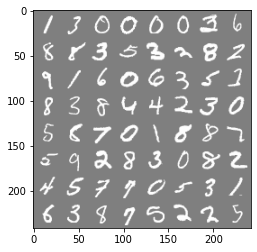

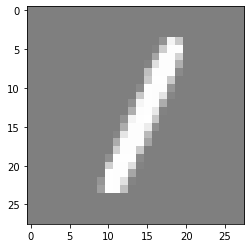

In [14]:
std = [0.5, 0.5, 0.5]
mean = [0.5, 0.5, 0.5]
pic,label = show()
img1 = pic[0].numpy()
img1.shape
img1 = img1.transpose(1,2,0)*std+mean
plt.imshow(img1)

In [15]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(stride=2,kernel_size=2)
        )
        self.dense = nn.Sequential(
            nn.Linear(14*14*128,1024),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(1024,10)
        )
    def forward(self,x):
        x = self.conv1(x)
        x = x.view(-1,14*14*128)
        x = self.dense(x)
        return x

In [16]:
model = Model()
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [17]:
print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [18]:
n_epoch = 5
for epoch in range(n_epoch):
    running_loss = 0.0
    running_correct = 0
    print("Epoch {}/{}".format(epoch,n_epoch))
    loss = 0.0
    for data in train_loder:
        x_train,y_train = data
        outputs = model(x_train)
        _,pred = torch.max(outputs.data,1)
        optimizer.zero_grad()
        loss = cost(outputs,y_train)

        loss.backward()
        optimizer.step()
    test_correct = 0
    for data in test_loder:
        x_test,y_test = data
        outputs = model(x_test)
        _,pred = torch.max(x_test)
        test_correct = torch.sum(pred == y_test.data)
    print("Loss :{}, Testcorresc: {}".format(loss,test_correct))

Epoch 0/5


KeyboardInterrupt: 